<H1 style="background-color:#00008b;color:#F8F8FF;">Project Report - Phillip Marsh</H1>
<hr>

<H2 style="color:#00008b;">GitHub URL</H2>
Phillip's GutHub can be found at: <a href="https://github.com/PhillipNM/UCDPA_PhillipMarsh" target="_blank">Phillip's GitHub Repository</a>
<pre style="font-family:arial;">
document should contain between 1,500 and 2,00 words
</pre>
<h2 style="color:#00008b;">Abstract</h2>
(short overview of the entire project)

<h2 style="color:#00008b;">Introduction</h2>
(Explain why you chose this project use case)

<h2 style="color:#00008b;">Datasets</h2>
(Provide a description of your dataset and source. Also justify why you chose this source)

<h6>Deciding on the dataset</h6>
<br>
I had several ideas, however, I explored three main ideas:

<pre style="font-family:arial;">
1. Predicting currency fx changes to maximise buys and sells.  
    As I have two children in Canada in university the fx rate for USD to CAD is always top of mind.  After exploring this for a bit the challenge to understand the market conditions that I could use for making predictions did not seem to fit well with what I needed for this project.
2. Flight delays, cancellations and the average compensation.  Are the airlines "gaming" the system to not pay-out customers
    given the turmoil in travel I thought it would be interesting to compare recent cancellations, delays and reasons and compensations vs. pre-covid data. I researched for datasets but could not find anything current, although there were some sites that may have had data; I would have to pay for and for this reason I decided against this topic.
3. COVID data.  This idea would have plenty of source data out there but would it offer the ability to make predictions and not just forecasting trends.
</pre>

   I picked the COVID idea as there is good data and the types of calculations and techniques required would lend itself to the project easily. This data is something we are all very familiar with at this time. Governments, countries and organizations and corporations have struggled with rules and regulations to balance controlling the epidemic vs. economic stability.

I reviewed a couple of sources and in the end selected "Our World In Data" (OWID).  OWID has a comprehensive set of publicly available data specifically for COVID.  In working with the FIL business continuity team, I assited with the COVID response. I came across this data source and found it very useful. In the end this is the source we used to provide global situational updates for the senior members in the organization so they could decide on stay at home and return to office across the organization.

source of covid data: https://github.com/owid/covid-19-data/tree/master/public/data 
<p>Originally I downloaded a (.csv) copy of the data to use but the file was large (I was getting an error that the file was to big for my type of GitHub repository account) when I tried to push the data to my GitHub repository.  I then researched how I could link to an external csv file, and this solved the problem</p>

source of GDP data: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false
<p>the file is a zip file which is difficult to connect to so in this case I downloaded the file and unzipped it.</p>


<h3>Import and review the data</h3>

In [1]:
# Import packages
import pandas as pd
import requests
import io
import datetime as dt
from datetime import datetime
from datetime import timedelta
import numpy as np

# Visualization
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
import seaborn as sb

# Machine learning



# Variables
column_count_limit=30 #number of columns deemed to be managble for this review


<h4>import data</h4>

In [2]:
# Import COVID data

# Link and download COVID dataset from OWID
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv" 
download = requests.get(url).content

# Create the COVID as a pandas dataframe
covid_data_raw = pd.read_csv(io.StringIO(download.decode('utf-8')),parse_dates=['date']) #need to parse the date field
#source: https://stackoverflow.com/questions/59004960/converting-date-format-in-a-dataframe-from-a-csv-file

# Import World Bank GDP data

    # source: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false

    # Create the GDP raw file as a pandas dataframe, headers start on row 4
gdp_data_raw = pd.read_csv("/Users/Phillip/UDCPA_PhillipMarsh/data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4489151.csv", skiprows=4)

 

<h5>exploring the covid data</h5>

In [3]:
#covid_data_raw.columns.tolist()
#columns_lst = covid_data_raw.columns.tolist() # create a list of the column headers from the dataframe
#columns_len = len(columns_lst)

#columns_len

In [4]:
# name of the dataframe with comments

def name_obj(df, comment, comment2):
    """Create staement naming the dataframe around comment and comment2
    
    Args:
        df (dataFrame): the name of the dataframe
        comment (string): comment string which goes before the name of the dataframe
        comment2 (string): comment string which goes after the name of the dataframe
    """
    name =[x for x in globals() if globals()[x] is df][0]
    print(comment,"%s"  % name,comment2)

#test the function
name_obj(covid_data_raw,"Dataframe Name is:","")
name_obj(gdp_data_raw,"Dataframe Name is:","")

Dataframe Name is: covid_data_raw 
Dataframe Name is: gdp_data_raw 


In [5]:
# create functions for reviewing dataframes

# create a function to make list from the column header names of a dataframe
def column_headers_list(df):
    """create a list of column headers
    
    Args:
        df (DataFrame): the name of the dataframe to use
    
    Returns:
        list of column headers
    """
    
    columns_lst = df.columns.tolist() # create a list of the column headers from the dataframe
        
    return print(columns_lst)

#test the function
column_headers_list(covid_data_raw)
column_headers_list(covid_data_raw)
print()
column_headers_list(gdp_data_raw)


['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [6]:
# create a function to count the number of items in the list from the column header names list of a dataframe

#columns_lst_test = column_headers_list(covid_data_raw)
#columns_len_test = len(columns_lst_test)


# Test function

#print(columns_len_test)
#type(columns_len_test)


In [7]:
# create a function determine if the data set is too wide
def columns_comment(xlist,column_count_limit=30):
    """Use column_len to decide if the dataframe is too large to manage
    
    Args:
        columns_len(int): from column_lst_summary function
        column_count_limit(float): how many columns is too much, optional
    """
    columns_len = len(xlist)
    
    if columns_len>column_count_limit:
        print("There are many columns, Drop a some of them to imporve performance and the size of the file")
    else:
        print("Number of columns appears manageable")
    
    return #print(columns_comment)

#test function
# test cor covid data
columns_lst_covid = covid_data_raw.columns.tolist()

columns_comment(columns_lst_covid)

print()

# test for gdp data
columns_lst_gdp = gdp_data_raw.columns.tolist()
columns_len_gdp = len(columns_lst_gdp)

columns_comment(columns_lst_gdp)
print(columns_len_gdp)# need to check this


There are many columns, Drop a some of them to imporve performance and the size of the file

There are many columns, Drop a some of them to imporve performance and the size of the file
67


In [8]:
# Understanding the data 

# Data information what are the available columns

covid_data_raw.shape

(216816, 67)

In [9]:
# show the column headers and the number of columns

df = covid_data_raw

columns_len = df.shape[1] # count the number of columns in the list

print(name_obj(df,"The headers from the", "Dataframe are:"))
column_headers_list(df)

print()

print(name_obj(df,"The","DatFrame has "+str(columns_len)+" columns"))

print()

#print(columns_comment(column_headers_list(df))) #xlist,column_count_limit=30)

The headers from the covid_data_raw Dataframe are:
None
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_

In [10]:
# Summary of covid_data_raw file
rows = covid_data_raw.shape[0]
cols = covid_data_raw.shape[1]

print("The raw data file has {} rows of data".format(f"{rows:,d}")," and {} columns".format(f"{cols:,d}"))
if cols>column_count_limit:
    print("There are many columns, drop a some of them to imporve performance and the size of the file")
else:
    print("Number of columns appears manageable")

The raw data file has 216,816 rows of data  and 67 columns
There are many columns, drop a some of them to imporve performance and the size of the file


In [11]:
# drop columns
    #source: https://datatofish.com/drop-columns-pandas-dataframe/#:~:text=Here%20is%20the%20approach%20that%20you%20can%20use,Python%20code%20to%20drop%20the%20%E2%80%98Shape%E2%80%99%20column%20is%3A
covid_data = covid_data_raw.drop([
    'continent',
    'new_cases_smoothed',
    'new_deaths_smoothed',
    'new_cases_smoothed_per_million',
    'new_deaths_smoothed_per_million',
    'icu_patients_per_million',
    'hosp_patients',
    'hosp_patients_per_million',
    'weekly_icu_admissions',
    'weekly_icu_admissions_per_million',
    'weekly_hosp_admissions',
    'weekly_hosp_admissions_per_million',
    'total_tests_per_thousand',
    'new_tests_per_thousand',
    'new_tests_smoothed',
    'tests_per_case',
    'tests_units',
    'new_vaccinations_smoothed',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'total_boosters_per_hundred',
    'new_vaccinations_smoothed_per_million',
    'new_people_vaccinated_smoothed',
    'new_people_vaccinated_smoothed_per_hundred',
    'stringency_index','median_age',
    'aged_65_older',
    'aged_70_older',
    'cardiovasc_death_rate',
    'diabetes_prevalence',
    'female_smokers',
    'male_smokers',
    'handwashing_facilities',
    'hospital_beds_per_thousand',
    'life_expectancy',
    'human_development_index',
    'excess_mortality_cumulative_absolute',
    'excess_mortality_cumulative',
    'excess_mortality',
    'excess_mortality_cumulative_per_million'
    ], 
    axis=1)

covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216816 entries, 0 to 216815
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   iso_code                         216816 non-null  object        
 1   location                         216816 non-null  object        
 2   date                             216816 non-null  datetime64[ns]
 3   total_cases                      207912 non-null  float64       
 4   new_cases                        207672 non-null  float64       
 5   total_deaths                     188868 non-null  float64       
 6   new_deaths                       188820 non-null  float64       
 7   total_cases_per_million          206960 non-null  float64       
 8   new_cases_per_million            206720 non-null  float64       
 9   total_deaths_per_million         187929 non-null  float64       
 10  new_deaths_per_million           187881 non-

In [12]:
# show the column headers and the number of columns

df = covid_data

columns_len = df.shape[1] # count the number of columns in the list

print(name_obj(df,"The headers from the", "Dataframe are:"))
column_headers_list(df)


The headers from the df Dataframe are:
None
['iso_code', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'reproduction_rate', 'icu_patients', 'total_tests', 'new_tests', 'new_tests_smoothed_per_thousand', 'positive_rate', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'population', 'population_density', 'gdp_per_capita', 'extreme_poverty']


In [13]:
# print a summary of covid_data

# Summary of covid_data_raw file
rows = covid_data.shape[0]
cols = covid_data.shape[1]

print("The raw data file has {} rows of data".format(f"{rows:,d}"),"and {} columns".format(f"{cols:,d}"))
if cols>column_count_limit:
    print("There are many columns, drop a some of them to imporve performance and the size of the file")
else:
    print("Number of columns appears manageable")

The raw data file has 216,816 rows of data and 26 columns
Number of columns appears manageable


In [14]:
covid_data.head(10)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,population_density,gdp_per_capita,extreme_poverty
0,AFG,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.125,0.125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,54.422,1803.987,NaN
1,AFG,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.125,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,54.422,1803.987,NaN
2,AFG,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.125,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,54.422,1803.987,NaN
3,AFG,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.125,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,54.422,1803.987,NaN
4,AFG,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.125,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,54.422,1803.987,NaN
5,AFG,Afghanistan,2020-02-29,5.0,0.0,NaN,NaN,0.125,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,54.422,1803.987,NaN
6,AFG,Afghanistan,2020-03-01,5.0,0.0,NaN,NaN,0.125,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,54.422,1803.987,NaN
7,AFG,Afghanistan,2020-03-02,5.0,0.0,NaN,NaN,0.125,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,54.422,1803.987,NaN
8,AFG,Afghanistan,2020-03-03,5.0,0.0,NaN,NaN,0.125,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,54.422,1803.987,NaN
9,AFG,Afghanistan,2020-03-04,5.0,0.0,NaN,NaN,0.125,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,54.422,1803.987,NaN


In [15]:
# Review Null data
# pd.set_option('display.max_rows',None)
print(covid_data.isna().sum())

iso_code                                0
location                                0
date                                    0
total_cases                          8904
new_cases                            9144
total_deaths                        27948
new_deaths                          27996
total_cases_per_million              9856
new_cases_per_million               10096
total_deaths_per_million            28887
new_deaths_per_million              28935
reproduction_rate                   53869
icu_patients                       189179
total_tests                        137429
new_tests                          141413
new_tests_smoothed_per_thousand    112851
positive_rate                      120889
total_vaccinations                 156129
people_vaccinated                  158822
people_fully_vaccinated            161565
total_boosters                     184678
new_vaccinations                   166903
population                           1269
population_density                

In [16]:
# How many records am I dealing with

#total_records = covid_data.count(axis=1)
#print(total_records)
#print("")

# show the countries/ locations in the data
print("ISO codes and Country")
print(covid_data.pivot_table(index = ['iso_code', 'location'], aggfunc ='size'))


print("")
# df.size
print("Size:")
print(covid_data.size)

print("")
# df.isnull()
column_picker ="total_deaths"
bool_series_null =pd.isnull(covid_data[column_picker])

print("Null",column_picker,": ")
print(covid_data[bool_series_null])
#print(covid_data.isnull())

print("")
# df.notnull()
bool_series = pd.notnull(covid_data[column_picker])
print("Not null:")
print(covid_data[bool_series])

print("")
# df.describe()
print("Describe:")
print(covid_data.describe)


ISO codes and Country
iso_code  location    
ABW       Aruba           917
AFG       Afghanistan     935
AGO       Angola          910
AIA       Anguilla        902
ALB       Albania         934
                         ... 
WSM       Samoa           667
YEM       Yemen           889
ZAF       South Africa    952
ZMB       Zambia          912
ZWE       Zimbabwe        910
Length: 244, dtype: int64

Size:
5637216

Null total_deaths : 
       iso_code     location       date  total_cases  new_cases  total_deaths  \
0           AFG  Afghanistan 2020-02-24          5.0        5.0           NaN   
1           AFG  Afghanistan 2020-02-25          5.0        0.0           NaN   
2           AFG  Afghanistan 2020-02-26          5.0        0.0           NaN   
3           AFG  Afghanistan 2020-02-27          5.0        0.0           NaN   
4           AFG  Afghanistan 2020-02-28          5.0        0.0           NaN   
...         ...          ...        ...          ...        ...           ..


Describe:
<bound method NDFrame.describe of        iso_code     location       date  total_cases  new_cases  total_deaths  \
0           AFG  Afghanistan 2020-02-24          5.0        5.0           NaN   
1           AFG  Afghanistan 2020-02-25          5.0        0.0           NaN   
2           AFG  Afghanistan 2020-02-26          5.0        0.0           NaN   
3           AFG  Afghanistan 2020-02-27          5.0        0.0           NaN   
4           AFG  Afghanistan 2020-02-28          5.0        0.0           NaN   
...         ...          ...        ...          ...        ...           ...   
216811      ZWE     Zimbabwe 2022-09-11     256870.0        0.0        5596.0   
216812      ZWE     Zimbabwe 2022-09-12     256888.0       18.0        5596.0   
216813      ZWE     Zimbabwe 2022-09-13     256904.0       16.0        5596.0   
216814      ZWE     Zimbabwe 2022-09-14     256939.0       35.0        5596.0   
216815      ZWE     Zimbabwe 2022-09-15     256939.0        0.0 

In [17]:
# Correlations of the covid_data
covid_data.corr()


,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,...,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,population_density,gdp_per_capita,extreme_poverty
total_cases,1.000000,0.716758,0.938522,0.484108,0.098082,0.016567,0.119617,0.000577,0.009255,0.477562,...,0.044082,0.828301,0.829756,0.830882,0.823176,0.498528,0.611181,-0.016360,0.015645,-0.036382
new_cases,0.716758,1.000000,0.728222,0.644549,0.060019,0.067264,0.078095,0.029909,0.029521,0.569824,...,0.177294,0.580631,0.591945,0.585309,0.505139,0.489012,0.543670,-0.014867,0.019757,-0.035571
total_deaths,0.938522,0.728222,1.000000,0.642886,0.047731,0.004985,0.131195,0.008943,0.014451,0.611314,...,0.029840,0.826450,0.849134,0.829251,0.720418,0.651053,0.704421,-0.020154,0.006306,-0.043933
new_deaths,0.484108,0.644549,0.642886,1.000000,-0.025177,0.008771,0.036859,0.071612,0.020219,0.847975,...,0.123924,0.373476,0.412355,0.362655,0.183584,0.641276,0.702066,-0.020423,0.007111,-0.045333
total_cases_per_million,0.098082,0.060019,0.047731,-0.025177,1.000000,0.240463,0.609512,0.074435,-0.025078,-0.043348,...,0.287658,-0.066820,-0.070989,-0.064801,-0.058378,-0.147905,-0.057356,0.023411,0.301346,-0.307025
new_cases_per_million,0.016567,0.067264,0.004985,0.008771,0.240463,1.000000,0.152659,0.235684,0.102895,0.031936,...,0.353569,-0.048687,-0.050311,-0.046224,-0.047171,-0.071289,-0.022469,0.017087,0.140077,-0.162009
total_deaths_per_million,0.119617,0.078095,0.131195,0.036859,0.609512,0.152659,1.000000,0.176492,0.006403,0.089965,...,0.194359,-0.065593,-0.061523,-0.064165,-0.051665,-0.127024,-0.050124,-0.009456,0.155962,-0.351995
new_deaths_per_million,0.000577,0.029909,0.008943,0.071612,0.074435,0.235684,0.176492,1.000000,0.041047,0.210990,...,0.314676,-0.065052,-0.061054,-0.066831,-0.076220,-0.053947,-0.023845,0.003624,0.075501,-0.224441
reproduction_rate,0.009255,0.029521,0.014451,0.020219,-0.025078,0.102895,0.006403,0.041047,1.000000,-0.049047,...,0.086059,0.008119,0.001217,0.002838,-0.013291,0.010784,0.037482,0.019780,0.138541,-0.190821
icu_patients,0.477562,0.569824,0.611314,0.847975,-0.043348,0.031936,0.089965,0.210990,-0.049047,1.000000,...,0.063698,0.484370,0.540268,0.510767,0.227963,0.548520,0.768315,-0.103491,0.107733,0.009852


In [18]:
# Import GDP data

#look at info for gdp data
print(gdp_data_raw.info())

# do not need most of the columns so will remove cols 4:63
gdp_data = gdp_data_raw.drop(gdp_data_raw.iloc[:,4:63],axis = 1)

gdp_data.columns = [c.replace(' ', '_') for c in gdp_data.columns]

print(gdp_data.info())
print()
print(gdp_data.head())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            133 non-null    float64
 5   1961            135 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            148 non-null    float64
 10  1966            151 non-null    float64
 11  1967            155 non-null    float64
 12  1968            160 non-null    float64
 13  1969            160 non-null    float64
 14  1970            169 non-null    float64
 15  1971            172 non-null    float64
 16  1972            172 non-null    float64
 17  1973            172 non-null    flo

In [19]:
# show the column headers and the number of columns

df = gdp_data

columns_len = df.shape[1] # count the number of columns in the list

print(name_obj(df,"The headers from the", "Dataframe are:"))
column_headers_list(df)

print()

print(name_obj(df,"The","DataFrame has "+str(columns_len)+" columns"))

print()

#print(columns_comment())

The headers from the df Dataframe are:
None
['Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code', '2019', '2020', '2021', 'Unnamed:_66']

The df DataFrame has 8 columns
None



In [20]:
# Correlations of the gdp_data
gdp_data.corr()

,2019,2020,2021,Unnamed:_66
2019,1.000000,0.999882,0.99950,NaN
2020,0.999882,1.000000,0.99963,NaN
2021,0.999500,0.999630,1.00000,NaN
Unnamed:_66,NaN,NaN,NaN,NaN


<h4>Summary of data</h4>

In [21]:
# Summary of Covid data
print("summary of Covid data")
print()

# Number of unique countries
n = covid_data.iso_code.nunique()
print("No of unique countries (covid_data):",n)

print("")

# Number of unique dates
n = covid_data.date.nunique()

# What are the range of dates in data
beg_date = min(covid_data["date"]) #starting point of the available data
end_date = max(covid_data["date"]) #most recent data in the file

print("No of unique dates: ",n)
print("From: ",beg_date.strftime("%b %d %Y")," to: ",end_date.strftime("%b %d %Y"))
print("")

# Number of records
rec = covid_data.shape[0]
col = covid_data.shape[1]

print("No of rows: ",f"{rec:,d}")
print("No of columns: ",f"{col:,d}") 
#source: https://stackoverflow.com/questions/60934535/format-integer-with-comma-using-python-printf
print("")

summary of Covid data

No of unique countries (covid_data): 244

No of unique dates:  989
From:  Jan 01 2020  to:  Sep 15 2022

No of rows:  216,816
No of columns:  26



In [22]:
# Summary of GDP data

print("summary of GDP Data")
print()


# Number of unique countries
n = gdp_data.Country_Code.nunique()
print("No of unique countries: ",n)
print("")

# Number of records
rec = gdp_data.shape[0]
col = gdp_data.shape[1]

print("No of rows: ",f"{rec:,d}")
print("No of columns: ",f"{col:,d}") 

summary of GDP Data

No of unique countries:  266

No of rows:  266
No of columns:  8


In [23]:
# Calculations for report:

# date calculations
# There needs to be a n_day (number of days) total for certain total columns to in turn calculate 
# comparative data against 100k of a countries population

days_calc = 14 #n days for calculations.  14 days is standard but we could run for differnt number of days eg. 25days

# n day calculations can't begin until the nth day after the first date in the dataset (beg_date)
first_calc_date = beg_date + - timedelta(days=days_calc)


# calculate the start date for the n days data for each record
n_day_start = covid_data["date"] - timedelta(days=days_calc)

print(n_day_start)
print()

# Insert a column with the n day start date
covid_data.insert(loc=3, column="n_day_start_date", value=n_day_start, allow_duplicates=True)
print(covid_data.info())



0        2020-02-10
1        2020-02-11
2        2020-02-12
3        2020-02-13
4        2020-02-14
            ...    
216811   2022-08-28
216812   2022-08-29
216813   2022-08-30
216814   2022-08-31
216815   2022-09-01
Name: date, Length: 216816, dtype: datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216816 entries, 0 to 216815
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   iso_code                         216816 non-null  object        
 1   location                         216816 non-null  object        
 2   date                             216816 non-null  datetime64[ns]
 3   n_day_start_date                 216816 non-null  datetime64[ns]
 4   total_cases                      207912 non-null  float64       
 5   new_cases                        207672 non-null  float64       
 6   total_deaths                     188868 non-null  flo

In [31]:
# n days totals 
# (https://stackoverflow.com/questions/28236305/how-do-i-sum-values-in-a-column-that-match-a-given-condition-using-pandas)
# https://python.tutorialink.com/calculate-14-day-rolling-average-on-data-with-two-hierarchies/

covid_data.sort_values(['iso_code','date'], ascending=(True,True), inplace=True)

# Rolling new cases 
rolling_new_cases = covid_data.groupby(['iso_code'])['new_cases'].transform(lambda x: x.rolling(days_calc, 1).sum())


# Insert a column with the "n" rolling new cases
new_column = str(days_calc)+"_days_rolling_new_cases"
print(new_column)

print(new_column in covid_data.columns) # Test for existing column# True

# delete new column
del covid_data[str(days_calc)+"_days_rolling_new_cases"]

#print(column_exsits)
covid_data.insert(loc=6, column=str(days_calc)+"_days_rolling_new_cases", value=rolling_new_cases, allow_duplicates=False)

# Test data using the iso code for USA
covid_data_usa = covid_data[covid_data["iso_code"]=="USA"]

covid_data_usa.head(20)

#repeat for new deaths

14_days_rolling_new_cases
True


,iso_code,location,date,n_day_start_date,total_cases,new_cases,14_days_rolling_new_cases,total_deaths,new_deaths,total_cases_per_million,...,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,population_density,gdp_per_capita,extreme_poverty
204371,USA,United States,2020-01-22,2020-01-08,1.0,NaN,NaN,NaN,NaN,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204372,USA,United States,2020-01-23,2020-01-09,1.0,0.0,0.0,NaN,NaN,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204373,USA,United States,2020-01-24,2020-01-10,2.0,1.0,1.0,NaN,NaN,0.006,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204374,USA,United States,2020-01-25,2020-01-11,2.0,0.0,1.0,NaN,NaN,0.006,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204375,USA,United States,2020-01-26,2020-01-12,5.0,3.0,4.0,NaN,NaN,0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204376,USA,United States,2020-01-27,2020-01-13,5.0,0.0,4.0,NaN,NaN,0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204377,USA,United States,2020-01-28,2020-01-14,5.0,0.0,4.0,NaN,NaN,0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204378,USA,United States,2020-01-29,2020-01-15,6.0,1.0,5.0,NaN,NaN,0.018,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204379,USA,United States,2020-01-30,2020-01-16,6.0,0.0,5.0,NaN,NaN,0.018,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2
204380,USA,United States,2020-01-31,2020-01-17,8.0,2.0,7.0,NaN,NaN,0.024,...,NaN,NaN,NaN,NaN,NaN,NaN,336997624.0,35.608,54225.446,1.2


<h3>Basic Charts</h3>

<h2 style="color:#00008b;">Implementation Process</h2>
(describe your entire process in detail)

For this project deciding on the data was quite a challenge.  I had quite a few ideas, but none seemed to have the data readily available to produce within the timeline or data did not appear to lend its self to the different techniques required


<h6>Hypothesis</h6>
My hypothesis is that countries with higher density and lower GDP have higher mortality rates than for higher density higher GDP countries. It would also be interesting to see if lower density and higher GDP countries fared and if density and GDP are a predicor of mortaility for a disease like COVID

Linking to data
	Different sources 

Exploring, Understanding and Cleaning data
	Print summary statistics
	Print DataFrame information
	Inspect for missing values
	
	Use visuals to identify issues with the data?
	
	df.info()
	df.shape
	df.size
	df.isnull()
	df.corr()
	List of column headers
	
	Handle the missing values (replace with NaN)
	
Joining data
Using dictionaries
Using dataframes
	
Charting
	Build a chart
		Colour, size, types
	Can we build a dashboard
	Can we make the charts interactive
	Annotate anomalies
	Build a story
	
	
Dates
	COVID creating 14 day averages per 100k of the population
		New cases
		Total cases
		New deaths
		Total deaths
		
	Can we identify the dates of lockdowns and the impact on positive cases per 100k; how long after a lockdown did the rates come back down, can we compare to a country that did not implement lockdowns
	
		Total positive cases
		Cases in hospital 
		Cases in ICU
		Reproduction rate
		
	Is there a correlation between
		The GDP of a country and the fatality
		The population density and the fatality
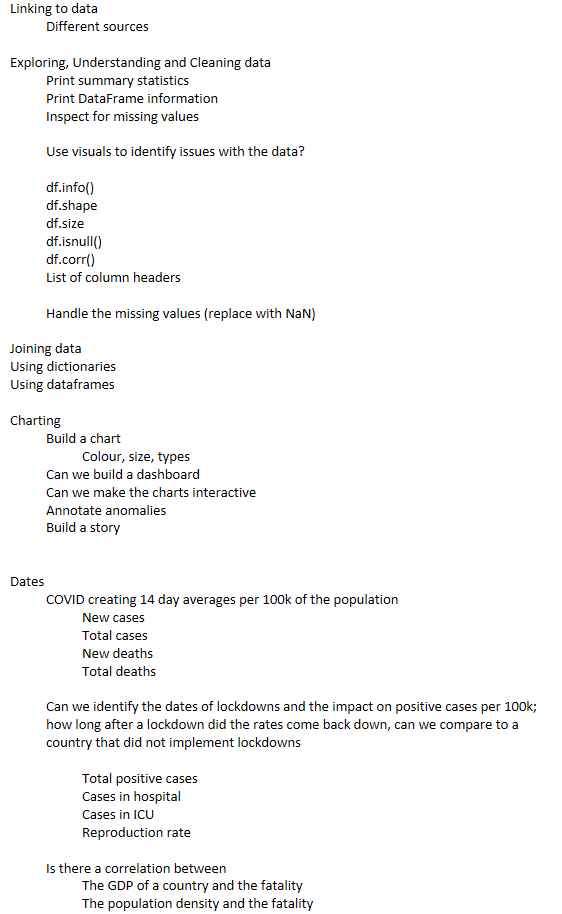

<h2 style="color:#00008b;">Results</h2>

<h2 style="color:#00008b;">Insights</h2>

<h2 style="color:#00008b;">References</h2>
HTML Code help: <a href="https://www.w3schools.com/html/html_links.asp" target="_blank">W3 Schools</a> 

Our World in Data (OWID): <a href="https://ourworldindata.org/coronavirus#explore-the-global-situation" target="_blank">https://ourworldindata.org/coronavirus#explore-the-global-situation</a> 

The World Bank GDP: <a href="https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false" target="_blank">https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?year_high_desc=false</a>

Python:
    <p>formatting numbers: https://pythonguides.com/python-format-number-with-commas/#:~:text=Python%20format%20number%20with%20commas%20Let%20us%20see,comma%20to%20every%20thousand%20places%20starting%20from%20left.</p>
    <p>formatting dates: https://stackabuse.com/how-to-format-dates-in-python/</p>
    